### Bank Churn Classification Problem 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import GridSearchCV

### Data Loading and Preprocessing

1). Loaded the dataset 

In [4]:
df = pd.read_csv('churn.csv', na_values = '?')

2). Shape of the dataset

In [5]:
df.shape

(10000, 14)

3). Drop the RowNumber, CustomerID and Surname columns.

In [6]:
df.drop(['RowNumber','CustomerId','Surname'], inplace=True,axis=1)

4). Checking null values

In [7]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

6). Create a dataframe X of features and targets Y  

In [9]:
X = df.loc[:,df.columns.drop(['Exited'])]
y = df['Exited']

### Data Visualisation

1). Visualize the distribution of the ‘Age’ and ‘CreditScore’ column

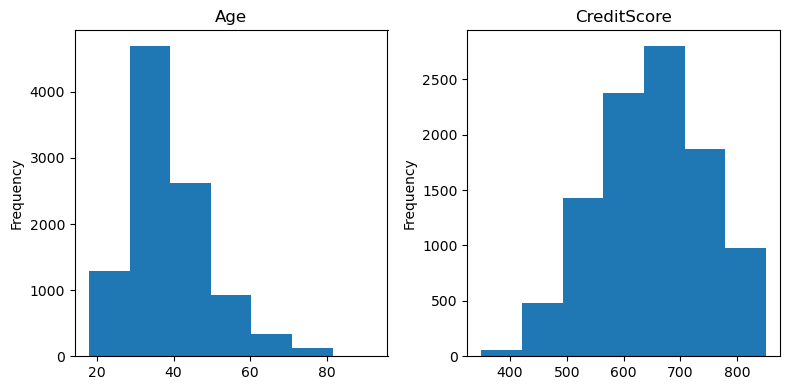

In [10]:
df1 = X[['Age','CreditScore']]
fig, axes = plt.subplots(1, 2, figsize=(8,4))
for axis, col in enumerate(df1.columns.tolist()):
    df1[col].plot.hist(ax=axes[axis],bins=7, title=col)
fig.tight_layout()

In [11]:
print(X['Age'].mean())
print(X['CreditScore'].mean())
print(X['Age'].std())
print(X['CreditScore'].std())

38.9218
650.5288
10.487806451704591
96.65329873613061


2). Visualize a barchart for ‘Gender’, ‘Geography’ and ‘IsActiveMember’ features for given dataset.

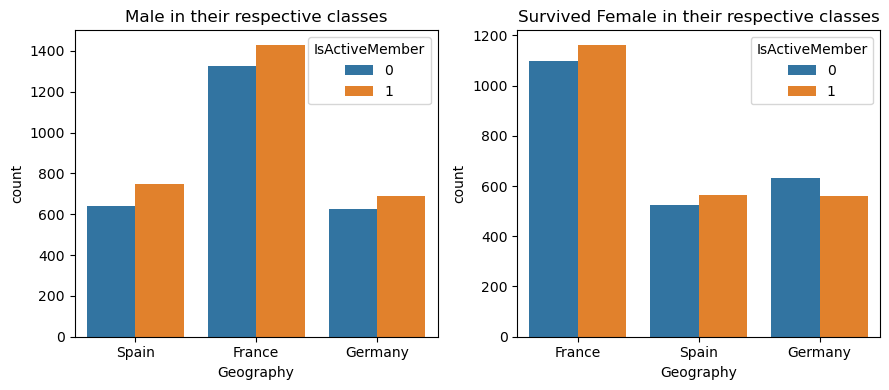

In [12]:
df1 = X[(X['Gender']=='Male')]
df2 = X[(X['Gender']=='Female')]
fig, axes = plt.subplots(1, 2, figsize=(9,4))
sns.countplot(x ='Geography', hue = "IsActiveMember", data = df1, ax=axes[0]).set(title='Male in their respective classes')
sns.countplot(x ='Geography', hue = "IsActiveMember", data = df2, ax=axes[1]).set(title='Survived Female in their respective classes')
fig.tight_layout()

3). plot a bar chart showing the distribution of the ‘Exited’ column

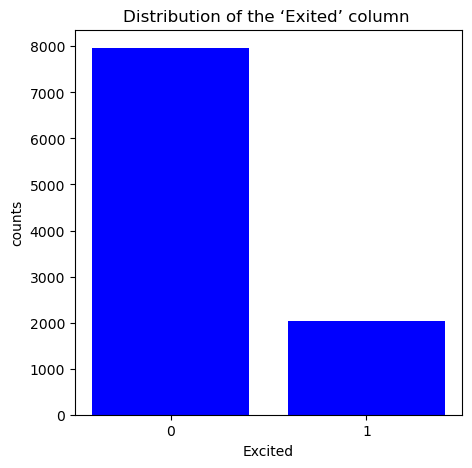

In [13]:
dft = df.Exited.value_counts()
dic = {'0':7963, '1':2037}
classes = list(dic.keys())
values = list(dic.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(classes, values, color ='blue')
 
plt.xlabel("Excited")
plt.ylabel("counts")
plt.title("Distribution of the ‘Exited’ column ")
plt.show()    

Convert categorical data into dummy variables 

In [14]:
X= pd.get_dummies(X, columns=['Gender','Geography'])

### Data Splitting

1).Split data into training and test sets 

In [15]:
X.shape

(10000, 13)

In [16]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

### Data Scaling 

1). Employ the ‘MinMaxScaler’  function on the continuous attribute

In [17]:
sc_scaled = MinMaxScaler()
X_train = sc_scaled.fit_transform(X_train)
X_test = sc_scaled.transform(X_test)

### Modelling 

In [18]:
model_1_lr = LogisticRegression() #Employ the Logistic Regression and instantiate the model

In [19]:
model_1_lr.fit(X_train, y_train) #fit() the model using the scaled X_train, y_train data.

LogisticRegression()

In [20]:
y_pred_lr = model_1_lr.predict(X_test)#`predict()` function to obtain predictions on X_test 

In [21]:
print('Accuracy Score is:',accuracy_score(y_test, y_pred_lr))
print('\n\n\nclassification_report: \n',classification_report(y_test, y_pred_lr),'\n\n') 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred_lr),'\n\n') 

Accuracy Score is: 0.809



classification_report: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1592
           1       0.60      0.20      0.30       408

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000
 


Confusion Matrix of data predicted 
 [[1538   54]
 [ 328   80]] 




In [22]:
model_2_svm = SVC() #Employ the Support Vector Machine (SVM) and instantiate the model

In [23]:
model_2_svm.fit(X_train, y_train) #‘fit()’ the model using the scaled X_train, y_train data

SVC()

In [24]:
y_pred_svm = model_2_svm.predict(X_test) #‘predict()’ function to obtain predictions on X_test  

In [25]:
print('Accuracy Score is:',accuracy_score(y_test, y_pred_svm))
print('\n\n\nclassification_report: \n',classification_report(y_test, y_pred_svm),'\n\n') 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred_svm),'\n\n') 

Accuracy Score is: 0.83



classification_report: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90      1592
           1       0.82      0.21      0.34       408

    accuracy                           0.83      2000
   macro avg       0.83      0.60      0.62      2000
weighted avg       0.83      0.83      0.79      2000
 


Confusion Matrix of data predicted 
 [[1573   19]
 [ 321   87]] 




In [26]:
smote = SMOTE()

In [27]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)#refit function on X_train and y_train

In [28]:
model_3_smote_lr = LogisticRegression()#Employ a new Logistic Regression classifier 

In [29]:
model_3_smote_lr.fit(X_train_smote,y_train_smote)#fit() the model using the balanced X_train_smote, y_train_smote data.

LogisticRegression()

In [30]:
y_pred_smote_lr = model_3_smote_lr.predict(X_test)#predict() function to obtain predictions on X_test 

In [31]:
print('Accuracy Score is:',accuracy_score(y_test, y_pred_smote_lr))
print('\n\n\nclassification_report: \n',classification_report(y_test, y_pred_smote_lr),'\n\n') 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred_smote_lr),'\n\n') 

Accuracy Score is: 0.717



classification_report: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1592
           1       0.39      0.66      0.49       408

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000
 


Confusion Matrix of data predicted 
 [[1163  429]
 [ 137  271]] 




In [32]:
model_4_smote_svm = SVC()#Employ a new SVM classifier from sklearn and instantiate the model

In [33]:
model_4_smote_svm.fit(X_train_smote, y_train_smote)#‘fit()’ the model

SVC()

In [34]:
y_pred_smote_svm = model_4_smote_svm.predict(X_test)#‘predict()’ function to obtain predictions on X_test 

In [35]:
print('Accuracy Score is:',accuracy_score(y_test, y_pred_smote_svm))
print('\n\n\nclassification_report: \n',classification_report(y_test, y_pred_smote_svm),'\n\n') 
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred_smote_svm),'\n\n') 

Accuracy Score is: 0.7755



classification_report: 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      1592
           1       0.46      0.64      0.54       408

    accuracy                           0.78      2000
   macro avg       0.68      0.73      0.70      2000
weighted avg       0.81      0.78      0.79      2000
 


Confusion Matrix of data predicted 
 [[1288  304]
 [ 145  263]] 




In [36]:
param_grid = {"gamma": [0.001, 0.01, 0.1], "C": [1,10,100,1000,10000]} #Initialize a variable label

In [37]:
model_3_grid = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv=5, verbose =1, scoring = 'accuracy')

In [38]:
model_3_grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'gamma': [0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

In [42]:
model_3_grid.best_params_ #best paramaters

{'C': 10000, 'gamma': 0.1}

In [43]:
model_3_grid.best_score_ #cross validated

0.8194954403887881

In [44]:
model_3_grid.score(X_test,y_test) #score

0.779

In [45]:
y_pred_grid = model_3_grid.predict(X_test)

In [46]:
print('Accuracy Score is:',accuracy_score(y_test, y_pred_grid))
print('\n\n\nclassification_report: \n',classification_report(y_test, y_pred_grid),'\n\n')
print('Confusion Matrix of data predicted \n',confusion_matrix(y_test, y_pred_grid),'\n\n')

Accuracy Score is: 0.779



classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      1592
           1       0.47      0.70      0.56       408

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000
 


Confusion Matrix of data predicted 
 [[1272  320]
 [ 122  286]] 


